In [ ]:
!pip3 install torch torchvision
!pip install ipdb

In [18]:
import numpy as np
import pandas as pd
import torch, torchvision
import torch.nn as nn
import torch.nn.functional as F
import ipdb
from torchvision import datasets
import torchvision.transforms as transforms
import random
import matplotlib.pyplot as plt

DEVICE = torch.device('cuda')

In [ ]:
train_dataset = datasets.CIFAR10(root = "/", train = True, download = True, transform = transforms.ToTensor())
test_dataset = datasets.CIFAR10(root = "/", train = False, download = True, transform = transforms.ToTensor())

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size = 64, shuffle = True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size = 64, shuffle = False)

10个分类标签: ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
图片矩阵的形状是: torch.Size([3, 32, 32])
对应的标签是: ship


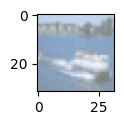

In [24]:
print('10个分类标签:', train_dataset.classes)
img, label = train_dataset[random.randint(0,len(train_dataset))] ## 随机取一张图片
print('图片矩阵的形状是:', img.shape) # 3个RGB维度 * 32 长 * 32 宽
print('对应的标签是:', train_dataset.classes[label])

## 图片打印出来看看
img0 = torchvision.utils.make_grid(img)
img1 = img0 / 2 + 0.5
img2 = img1.numpy()
img3 = np.transpose(img2, (1,2,0))
plt.figure(figsize=(1,1))
plt.imshow(img3)

In [11]:
class net(nn.Module):
  def __init__(self):
    super(net, self).__init__()

    self.conv = nn.Conv2d(in_channels=3, out_channels=18, kernel_size = 3, stride = 1) #
    self.pool = nn.MaxPool2d(kernel_size = 3, stride = 1) # 3核
    self.relu = nn.ReLU()
    self.dense = nn.Linear(14112, 10)

  def forward(self, x):
    # x 形状为 64,3,32,32
    #ipdb.set_trace()
    x = self.conv(x) # x = 64,18,30,30
    x = self.relu(x) # x = 64,18,30,30
    x = self.pool(x) # x = 64,18,28,28
    x = x.view(x.size(0), -1)   # x = 64,14112
    x = self.dense(x)
    return x

In [13]:
model = net().to(DEVICE)
criterion = nn.CrossEntropyLoss()   # do not need softmax layer when using CEloss criterion
optimizer = torch.optim.Adam(model.parameters(), lr = 1e-1)

In [14]:
# training for NUM_EPOCHS
for i in range(10):
  temp_loss = []
  for (x, y) in train_loader:
    x, y = x.float().to(DEVICE), y.to(DEVICE)
    outputs = model(x)
    loss = criterion(outputs, y)
    temp_loss.append(loss.item())

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

  print("Loss at {}th epoch: {}".format(i, np.mean(temp_loss)))

Loss at 0th epoch: 2.374119226280076
Loss at 1th epoch: 2.3115928453557633
Loss at 2th epoch: 2.311867415752557
Loss at 3th epoch: 2.3118735710373315
Loss at 4th epoch: 2.3114872686088543
Loss at 5th epoch: 2.3114832124441786
Loss at 6th epoch: 2.3120057717003784
Loss at 7th epoch: 2.3120446119771896
Loss at 8th epoch: 2.312008179667051
Loss at 9th epoch: 2.311837716785538


In [15]:
y_pred, y_true = [], []
with torch.no_grad():
  for x, y in test_loader:
    x, y = x.float().to(DEVICE), y.to(DEVICE)
    outputs = F.softmax(model(x)).max(1)[-1]       # predicted label
    y_true += list(y.cpu().numpy())                # true label
    y_pred += list(outputs.cpu().numpy())

<ipython-input-15-e8f9d04bf627>:5: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  outputs = F.softmax(model(x)).max(1)[-1]       # predicted label


In [16]:
# evaluation result
from sklearn.metrics import accuracy_score
accuracy_score(y_true, y_pred)

0.1